In [83]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings 
warnings.filterwarnings("ignore")

In [84]:
company_round_dataset = pd.read_csv('C:/Users/LaptopCheckout/Documents/CSCE_5214/rounds2.csv', encoding = 'ISO 8859-1')
company_dataset = pd.read_csv('C:/Users/LaptopCheckout/Documents/CSCE_5214/companies.csv', encoding = 'ISO 8859-1')
routing = pd.read_csv('C:/Users/LaptopCheckout/Documents/CSCE_5214//mapping.csv', encoding = 'ascii', engine = 'python')

In [85]:
company_round_dataset = company_round_dataset.rename({'company_permalink': 'link'}, axis=1) 

In [86]:
company_dataset=company_dataset.rename({'permalink': 'round_link'}, axis=1) 

In [87]:
company_round_dataset.head()

,link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [88]:
company_dataset.shape

(66368, 10)

In [89]:
company_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   round_link     66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [90]:
company_dataset.describe()

,round_link,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/-Fame,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,1/1/2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [91]:
company_round_dataset.head()

,link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [92]:
company_round_dataset.shape

(114949, 6)

### looking for unique company's in round_dataset

In [93]:
company_round_dataset['link'] = company_round_dataset['link'].str.upper()
company_round_dataset['link'].nunique(dropna = True)

66370

### looking for unique company's in company_dataset

In [94]:
company_dataset['round_link'] = company_dataset['round_link'].str.upper()
company_dataset['round_link'].nunique(dropna = True)

66368

### looking for companies in round_dataset which are not present in companies_dataset

In [95]:
company_round_dataset[~company_round_dataset['link'].isin(company_dataset['round_link'])]

,link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,1/2/2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,9/8/2014,NaN
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,6/9/2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,6/9/2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


### Merging companies_dataset & round_dataset as Master_dataset

In [96]:
master_dataset = pd.merge(company_round_dataset, company_dataset, how = 'inner', left_on = 'link', right_on = 'round_link')

In [97]:
master_dataset.shape

(114942, 16)

### removing permalink column from master_dataset

In [98]:
master_dataset = master_dataset.drop('round_link', axis = 1)
master_dataset.head()

,link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007


In [99]:
master_dataset.isnull().sum()

link                           0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [100]:
master_dataset = master_dataset.rename({'funding_round_code': 'round_code_type','founded_at': 'place','raised_amount_usd':'invested_amount','funding_round_type':'type','country_code':'country','primary_category':"primary",'category_list':'categList'}, axis=1) 
routing=routing.rename({'category_list':'categList'}, axis=1)

### looking for missing value percentage for every column 

In [101]:
round(100*(master_dataset.isnull().sum()/len(master_dataset.index)) ,2)

link                        0.00
funding_round_permalink     0.00
type                        0.00
round_code_type            72.91
funded_at                   0.00
invested_amount            17.39
name                        0.00
homepage_url                5.33
categList                   2.96
status                      0.00
country                     7.54
state_code                  9.52
region                      8.84
city                        8.84
place                      17.85
dtype: float64

In [102]:
master_dataset = master_dataset.drop(['round_code_type', 'place'], axis = 1)
round(100*(master_dataset.isnull().sum()/len(master_dataset.index)) ,2)

link                        0.00
funding_round_permalink     0.00
type                        0.00
funded_at                   0.00
invested_amount            17.39
name                        0.00
homepage_url                5.33
categList                   2.96
status                      0.00
country                     7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [103]:
master_dataset.dropna(subset = ['invested_amount'],inplace = True)

round(100*(master_dataset.isnull().sum()/len(master_dataset.index)) ,2)

link                       0.00
funding_round_permalink    0.00
type                       0.00
funded_at                  0.00
invested_amount            0.00
name                       0.00
homepage_url               4.56
categList                  1.10
status                     0.00
country                    6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [104]:
funding_type = pd.DataFrame(master_dataset.where(master_dataset['type'].
                                            isin(['seed','angel', 'venture','private_equity'])).
                         groupby('type')['invested_amount'].median()).reset_index()
print(funding_type)

             type  invested_amount
0           angel         400000.0
1  private_equity       20000000.0
2            seed         275000.0
3         venture        5000000.0


In [105]:
funding_type.loc[(funding_type['invested_amount'] >= 5000000.00) &
                        (funding_type['invested_amount'] <= 15000000.00)]

,type,invested_amount
3,venture,5000000.0


In [106]:
top_funding_frame = master_dataset[master_dataset['type'] == 'venture']


### country analysis

In [107]:
top5_country=pd.DataFrame(top_funding_frame.groupby('country')['invested_amount'].sum().sort_values(ascending = False).head(5))
top5_country.reset_index(inplace = True)
top5_country

,country,invested_amount
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09


In [108]:
top_funding_frame.head()

,link,funding_round_permalink,type,funded_at,invested_amount,name,homepage_url,categList,status,country,state_code,region,city
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,9/11/2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View


### SectorAnalysis

In [109]:
top_funding_frame['categList'].value_counts()

Biotechnology                                            5512
Software                                                 4070
Health Care                                              1393
Clean Technology                                         1320
Enterprise Software                                      1185
                                                         ... 
Data Centers|Information Technology|Internet|Services       1
Market Research|Semantic Search|Video                       1
Assisted Living|Elder Care|Health Care                      1
Recreation|Sports                                           1
Diagnostics|Investment Management|Services                  1
Name: categList, Length: 10557, dtype: int64

In [110]:
top_funding_frame['primary'] = top_funding_frame['categList'].str.split('|').str[0]

top_funding_frame['primary'].value_counts()

Biotechnology           6942
Software                4214
Advertising             2273
Health Care             1845
Enterprise Software     1803
                        ... 
Enterprise Hardware        1
High Schools               1
High School Students       1
Mens Specific              1
Task Management            1
Name: primary, Length: 607, dtype: int64

In [111]:
routing['Blanks'].value_counts()
routing = routing.dropna()

routing = routing.drop('Blanks', axis =1)
routing.head()


,categList,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [112]:
routing['categList'] = routing['categList'].apply(lambda x : x.replace('0','na'))


In [113]:
routing = pd.melt(routing, id_vars = 'categList', value_vars = ['Social, Finance, Analytics, Advertising','Others','Entertainment','Health','Cleantech / Semiconductors','Manufacturing','News, Search and Messaging','Automotive & Sports'], var_name = 'main_sector')

In [114]:
routing.head()
routing = routing[routing.value==1]
routing.head()

,categList,main_sector,value
3,Accounting,"Social, Finance, Analytics, Advertising",1
5,Ad Targeting,"Social, Finance, Analytics, Advertising",1
8,Advertising,"Social, Finance, Analytics, Advertising",1
9,Advertising Exchanges,"Social, Finance, Analytics, Advertising",1
10,Advertising Networks,"Social, Finance, Analytics, Advertising",1


In [115]:
routing = routing.drop('value', axis = 1)
routing.shape

(687, 2)

In [116]:
venture_sector_frame = pd.merge(top_funding_frame, routing, how = 'inner', left_on = 'primary', right_on = 'categList')

In [117]:
venture_sector_frame.head()

,link,funding_round_permalink,type,funded_at,invested_amount,name,homepage_url,categList_x,status,country,state_code,region,city,primary,categList_y,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,6/10/2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,7/5/2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Media,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Media,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,6/8/2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Media,Entertainment


In [118]:
venture_sector_frame = venture_sector_frame.drop('categList_y', axis = 1)

In [119]:
venture_sector_frame.rename(columns = {'categList_x' : 'category_list'}, inplace = True)

venture_sector_frame.head()

,link,funding_round_permalink,type,funded_at,invested_amount,name,homepage_url,category_list,status,country,state_code,region,city,primary,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,6/10/2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,7/5/2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,6/8/2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment


In [120]:
usa_DataFrame=venture_sector_frame.loc[venture_sector_frame['country']=='USA'].reset_index()
china_DataFrame=venture_sector_frame.loc[venture_sector_frame['country']=='CHN'].reset_index()
GBR_DataFrame=venture_sector_frame.loc[venture_sector_frame['country']=='GBR'].reset_index()

In [121]:
usa_DataFrame.drop('index', axis = 1, inplace = True)

usa_DataFrame.shape

(35784, 15)

In [122]:
china_DataFrame.drop('index', axis = 1, inplace = True)
china_DataFrame.shape

(1547, 15)

In [123]:
GBR_DataFrame.drop('index', axis = 1, inplace = True)
GBR_DataFrame.shape

(2035, 15)

In [124]:
usa_DataFrame.head()

,link,funding_round_permalink,type,funded_at,invested_amount,name,homepage_url,category_list,status,country,state_code,region,city,primary,main_sector
0,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,6/8/2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment
1,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,2/5/2013,650000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
2,/ORGANIZATION/AUDIOSOCKET,/funding-round/4e3a53eec6c609943df752206070b23f,venture,2/9/2009,750000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
3,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
4,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,5/2/2009,2000000.0,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,Media,Entertainment


### sector wise investement in USA

In [126]:
USA_sector = pd.DataFrame(D1.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).rename('total_investment_count')).reset_index()

USA_sector['country'] = 'USA'

#Top 3 Sectors having the highest number of investments in USA
USA_sector.head(3)

,main_sector,total_investment_count,country
0,Others,8310,USA
1,Cleantech / Semiconductors,7857,USA
2,"Social, Finance, Analytics, Advertising",7246,USA


### Sector wise investement in CHN

In [127]:
CHN_sector = pd.DataFrame(D2.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).rename('total_investment_count')).reset_index()

#Add a column 'country' to easily identify the country of investment
CHN_sector['country'] = 'CHN'

#Top 3 Sectors having the highest number of investments in GBR
CHN_sector.head(3)

,main_sector,total_investment_count,country
0,Others,468,CHN
1,"Social, Finance, Analytics, Advertising",281,CHN
2,"News, Search and Messaging",255,CHN


### sector wise investement in GBR

In [128]:
GBR_sector = pd.DataFrame(D3.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).rename('total_investment_count')).reset_index()

GBR_sector['country'] = 'GBR'

GBR_sector.head(3)

,main_sector,total_investment_count,country
0,Others,516,GBR
1,Cleantech / Semiconductors,437,GBR
2,"Social, Finance, Analytics, Advertising",421,GBR


### ploting

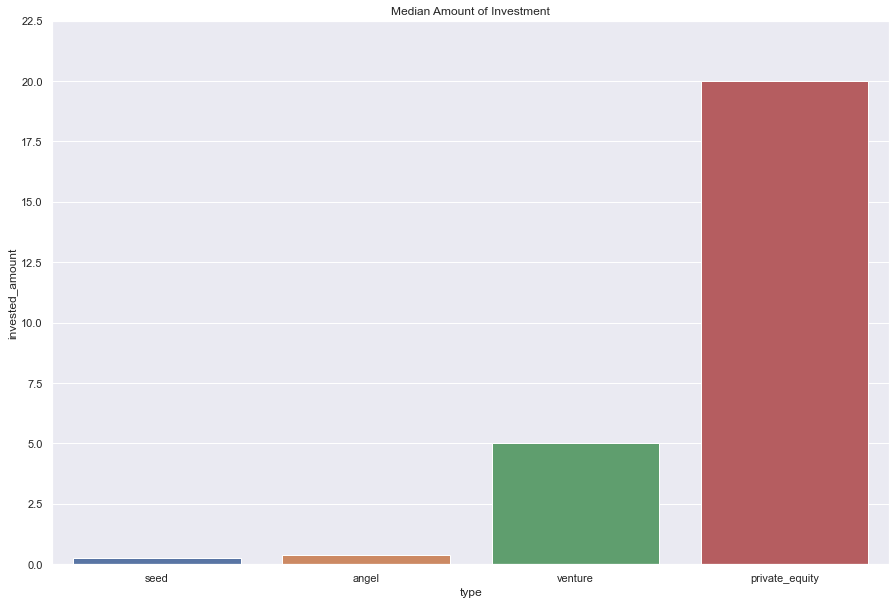

In [129]:
plt.figure(figsize = [15,10])

sns.set_theme()

fig = sns.barplot(data = funding_type, x = 'type', y = 'invested_amount', order = ['seed', 'angel', 'venture', 'private_equity'])

plt.yticks(fig.get_yticks(), fig.get_yticks() / 1000000)

plt.ylabel("invested_amount")

plt.title("Median Amount of Investment") 

plt.show()

### country plot

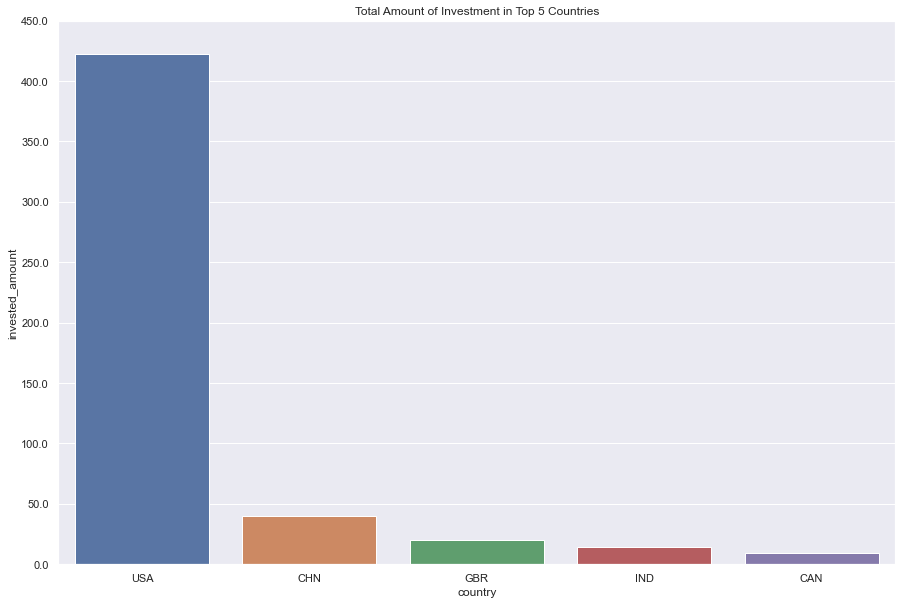

In [130]:
plt.figure(figsize = [15,10])

sns.set_theme()

fig = sns.barplot(data = top5_country, x = 'country', y = 'invested_amount')

plt.yticks(fig.get_yticks(), fig.get_yticks() / 1000000000)

plt.ylabel("invested_amount")

plt.title("Total Amount of Investment in Top 5 Countries") 

plt.show()


### Top 3 sectors 

In [133]:
america = USA_sector.sort_values(by='total_investment_count',ascending = False).head(3)
britan = GBR_sector.sort_values(by='total_investment_count',ascending = False).head(3)
china = CHN_sector.sort_values(by='total_investment_count',ascending = False).head(3)

combined = pd.merge(pd.merge(america,britan,how='outer'),china,how='outer')

combined


,main_sector,total_investment_count,country
0,Others,8310,USA
1,Cleantech / Semiconductors,7857,USA
2,"Social, Finance, Analytics, Advertising",7246,USA
3,Others,516,GBR
4,Cleantech / Semiconductors,437,GBR
5,"Social, Finance, Analytics, Advertising",421,GBR
6,Others,468,CHN
7,"Social, Finance, Analytics, Advertising",281,CHN
8,"News, Search and Messaging",255,CHN


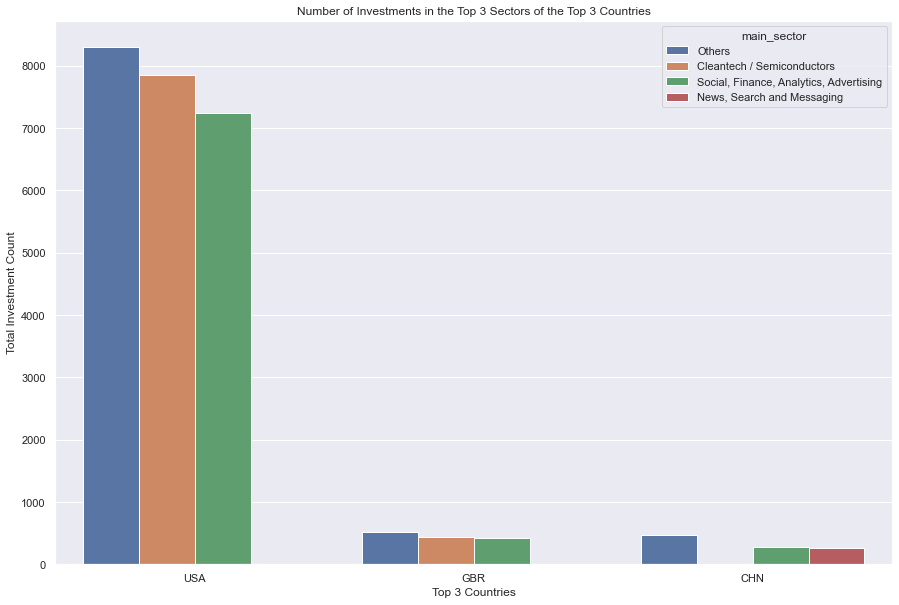

In [134]:
plt.figure(figsize = [15,10])

sns.set_theme()

sns.barplot(x = 'country', y = 'total_investment_count',data = combined, hue = 'main_sector')

plt.ylabel("Total Investment Count")

plt.xlabel("Top 3 Countries")

plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 

plt.show()